Text(0.5, 1.0, 'DOG of img1')

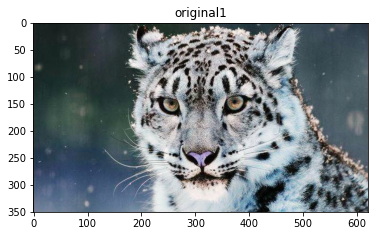

<Figure size 432x288 with 0 Axes>

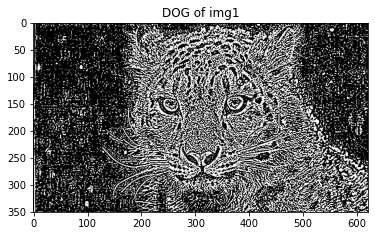

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image1 = cv2.imread('img1.jpg')
plt.figure()
plt.imshow(image1)
plt.title('original1')
plt.figure()

g1 = cv2.GaussianBlur(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) ,(3,3),0)
g2 = cv2.GaussianBlur(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY),(5,5),0)
diff_g = g2 - g1
plt.figure()
plt.imshow(diff_g, cmap = 'gray')
plt.title('DOG of img1')


SIFT with 250 keypoints


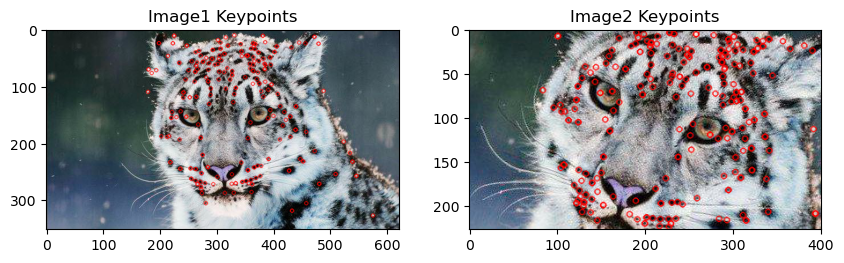

In [2]:
image1 = cv2.imread('img1.jpg')
image2 = cv2.imread('img2.jpg')
gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

sift = cv2.xfeatures2d.SIFT_create(250)
img1_keypoints, img1_descriptor = sift.detectAndCompute(gray1, None)
img2_keypoints, img2_descriptor = sift.detectAndCompute(gray2, None)

fx, plots = plt.subplots(1, 2 ,  figsize=(10,20))
output_image1 = np.copy(image1)
output_image2 = np.copy(image2)
cv2.drawKeypoints(image1 , img1_keypoints, output_image1 , color = (255, 0, 0))
plots[0].set_title("Image1 Keypoints")
plots[0].imshow(output_image1)

cv2.drawKeypoints(image2 , img2_keypoints, output_image2 , color = (255, 0,0))
plots[1].set_title("Image2 Keypoints")
plots[1].imshow(output_image2)

print('SIFT with 250 keypoints')

Number of matching points: 250
Number of matching points: 125


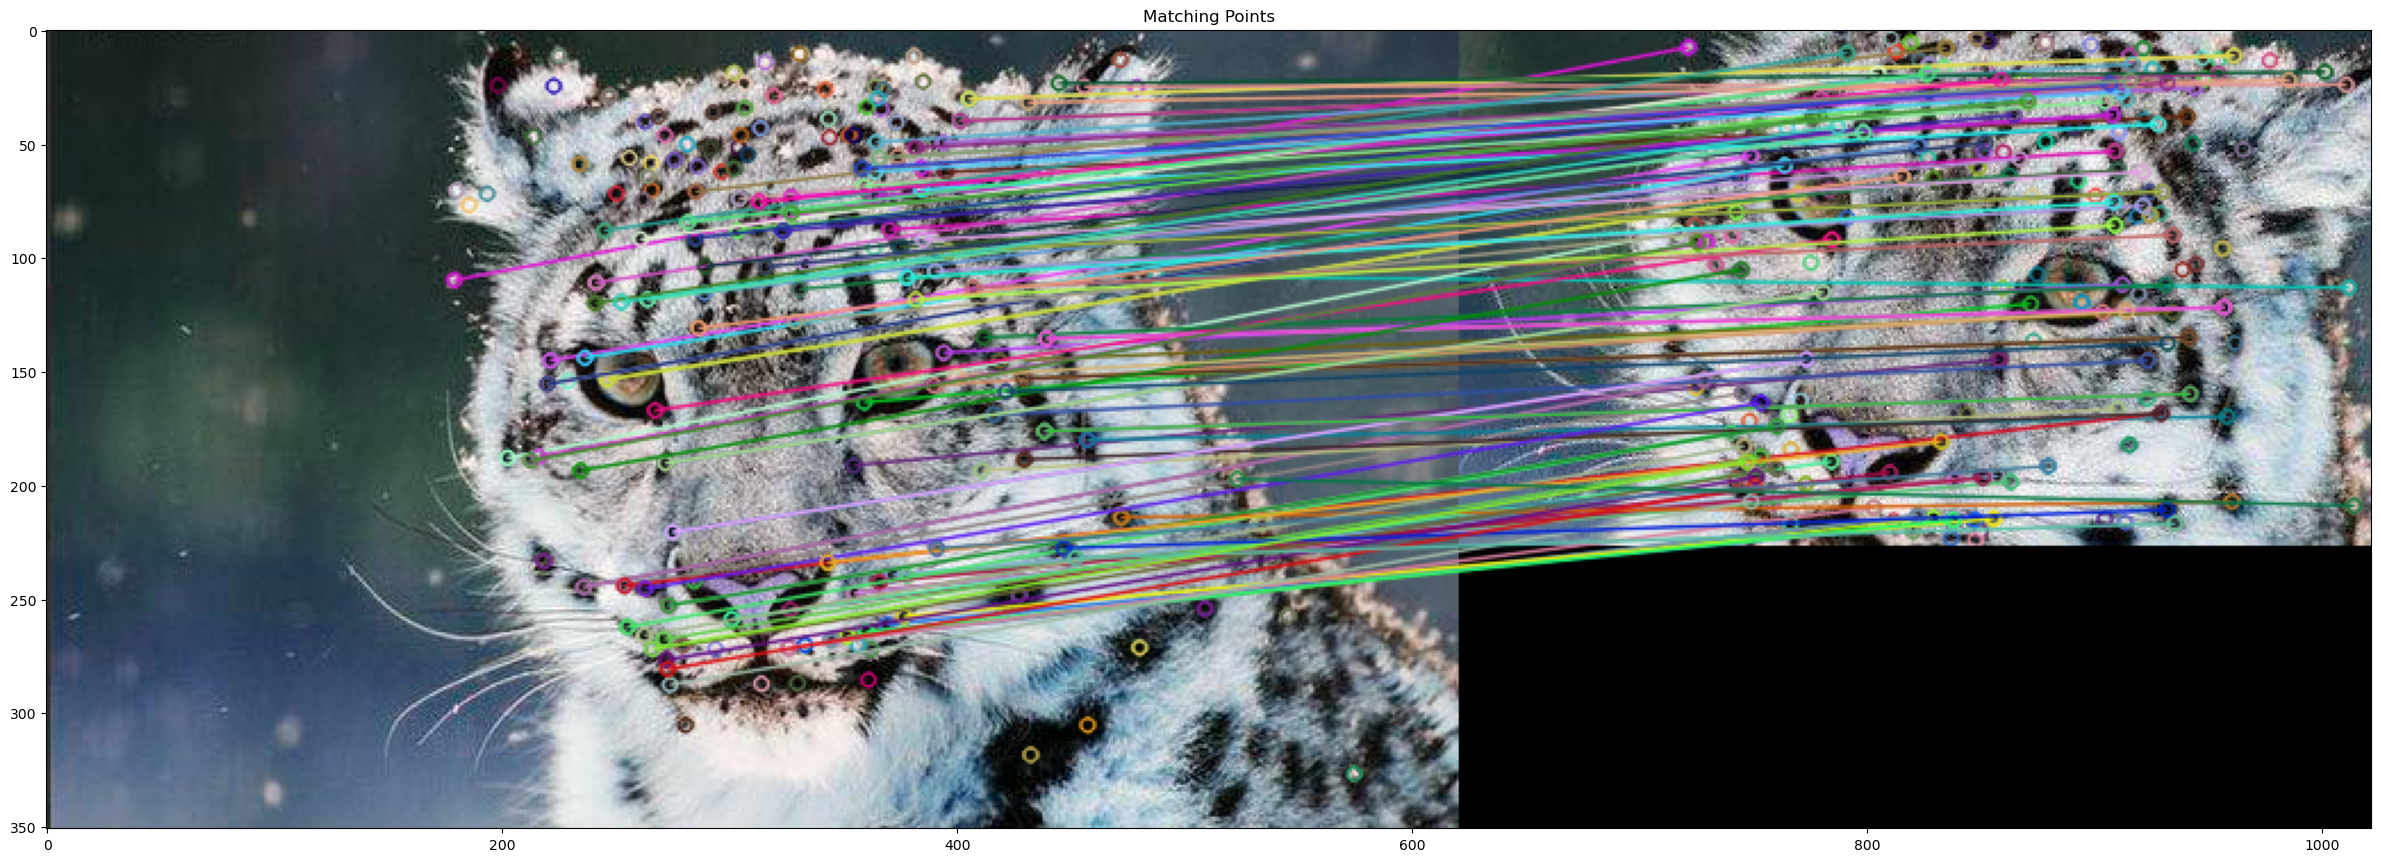

In [3]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = False)
matches = bf.knnMatch(img1_descriptor, img2_descriptor, k=2)
print(f'Number of matching points: {len(matches)}')
good_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_matches.append(m)
print(f'Number of matching points: {len(good_matches)}')
result = cv2.drawMatches(image1, img1_keypoints, image2 , img2_keypoints, good_matches, image2)
plt.figure(figsize=(30,45))
plt.title('Matching Points')
plt.imshow(result)
plt.show()

In [4]:
image1 = cv2.imread('img1.jpg')
image2 = cv2.imread('img2.jpg')
image3 = cv2.imread('img3.jpg')
gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
gray3 = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)

sift = cv2.xfeatures2d.SIFT_create(1000)
img1_keypoints, img1_descriptor = sift.detectAndCompute(gray1, None)
img2_keypoints, img2_descriptor = sift.detectAndCompute(gray2, None)
img3_keypoints, img3_descriptor = sift.detectAndCompute(gray3, None)

200735115.7607422
(2898, 1)
(200, 128)


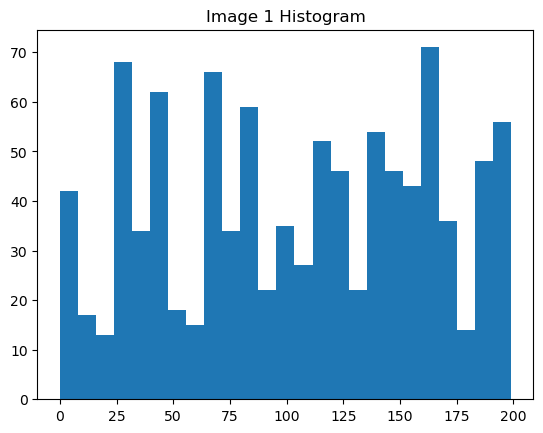

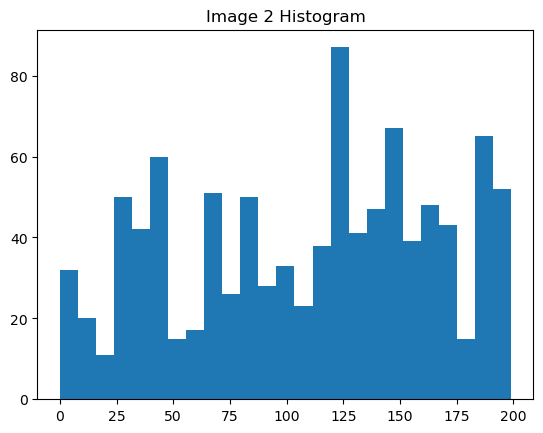

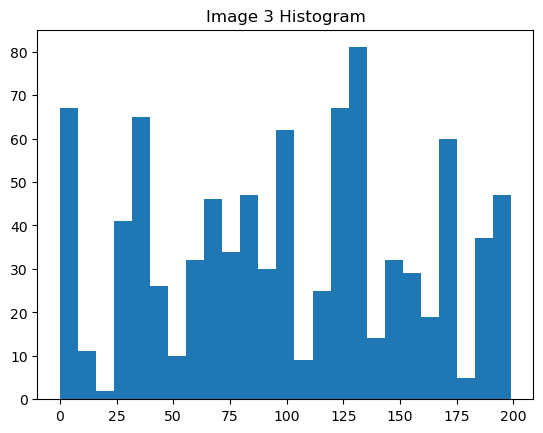

In [5]:
imgs_keypoints = np.concatenate((img1_descriptor,img2_descriptor,img3_descriptor), axis=0)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness,labels,centers = cv2.kmeans(imgs_keypoints,200,None,criteria,200,flags)
print(compactness)
print(labels.shape)
print(centers.shape)

image1_label = labels[0:1000]
image2_label = labels[1000:2000]
image3_label = labels[2000:]

plt.figure()
plt.hist(image1_label , bins = 25)
plt.title("Image 1 Histogram")
plt.show()

plt.figure()
plt.hist(image2_label , bins = 25)
plt.title("Image 2 Histogram")
plt.show()

plt.figure()
plt.hist(image3_label , bins = 25)
plt.title("Image 3 Histogram")
plt.show()